# Flexible model creation and molecule formation investigation

This notebook will explore how to create and explore a custom model, and use that to compare the stardis molecular solver to the molecular solver implemented in [Korg](https://ajwheeler.github.io/Korg.jl/stable/). 

In [1]:
#Basic needed imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from stardis.io.base import parse_config_to_model
from stardis.plasma import create_stellar_plasma
from astropy import units as u

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

In [2]:
config, adata, stellar_model = parse_config_to_model('basic_config.yml')

In [3]:
stellar_model.temperatures

<Quantity [9934.3, 9678.4, 9424.6, 9168.5, 8903.8, 8620.2, 8462.6, 8290.4,
           8097.7, 7876.9, 7618.2, 7314.8, 6983.3, 6694.8, 6451.9, 6235.2,
           6044.3, 5875.7, 5727.4, 5597.1, 5483.1, 5382.5, 5294.4, 5216.8,
           5148.5, 5088.6, 5034.4, 4988.1, 4944.1, 4905.9, 4870.5, 4838.3,
           4808.6, 4780.9, 4754.7, 4729.9, 4706. , 4682.9, 4660.2, 4637.8,
           4615.6, 4593.5, 4571.5, 4549.5, 4527.4, 4504.9, 4461. , 4416.3,
           4371.3, 4326.1, 4280.8, 4235.5, 4190.4, 4145.9, 4102.6, 4066.8] K>

These temperatures come from the model we read in, which represent the sun. However, for demonstration purposes, let's overwrite these temperatures to go from 3,000 to 10,000 K. This can be done by simply overwriting the object's temperatures attribute. For ease of use, let's match the same number of depth points as the existing one, so we don't have to worry about shape mismatches for other parts of the model. We'll also overwrite the density so we can examine how molecular formation changes purely as a function of temperature.

In [4]:
stellar_model.temperatures = np.linspace(3000, 10000, len(stellar_model.temperatures)) * u.K
stellar_model.composition.density = np.ones_like(stellar_model.composition.density) * 3e-7 #This is a reasonable density above the solar photosphere

In [5]:
stellar_plasma = create_stellar_plasma(stellar_model, adata, config) #Then we go ahead and create the stellar plasma. This will solve the ionization and molecular balance equations.

Negative ionic molecules not currently supported. Assuming no H2-.
Negative ionic molecules not currently supported. Assuming no C2-.
Negative ionic molecules not currently supported. Assuming no CH-.
Negative ionic molecules not currently supported. Assuming no OH-.
Negative ionic molecules not currently supported. Assuming no SiH-.
Negative ionic molecules not currently supported. Assuming no HS-.
Negative ionic molecules not currently supported. Assuming no CN-.
Negative ionic molecules not currently supported. Assuming no CS-.
Negative ionic molecules not currently supported. Assuming no FeO-.
Negative ionic molecules not currently supported. Assuming no H2-.
Negative ionic molecules not currently supported. Assuming no C2-.
Negative ionic molecules not currently supported. Assuming no CH-.
Negative ionic molecules not currently supported. Assuming no OH-.
Negative ionic molecules not currently supported. Assuming no SiH-.
Negative ionic molecules not currently supported. Assuming 

Now we can investigate each of the molecular densities in the plasma. 

In [6]:
stellar_plasma.molecule_number_density

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
Molecule,,,,,,,,,,,,,,,,,,,,,
H2,4.173526e+16,3.524205e+16,2.836289e+16,2.166660e+16,1.573569e+16,1.096084e+16,7.430232e+15,4.985077e+15,3.362091e+15,2.305035e+15,...,4.149437e+12,3.827602e+12,3.536749e+12,3.273035e+12,3.033149e+12,2.814238e+12,2.613836e+12,2.429808e+12,2.260302e+12,2.103711e+12
Li2,1.083895e+04,2.556534e+03,0.000000e+00,1.736232e+04,1.703398e+04,1.801338e+03,1.225000e+03,1.076660e+04,0.000000e+00,1.439098e+04,...,4.810851e+03,4.919161e+03,5.027418e+03,5.135517e+03,5.243352e+03,5.350815e+03,5.457791e+03,5.564162e+03,5.669803e+03,5.774583e+03
B2,2.001489e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.175067e+02,0.000000e+00,5.503644e+03,0.000000e+00,0.000000e+00,2.124297e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,1.826164e+05,3.438785e+04,0.000000e+00,0.000000e+00,0.000000e+00,5.516299e+05,0.000000e+00
C2,6.308218e+12,3.764890e+12,1.997027e+12,9.841823e+11,4.723712e+11,2.282457e+11,1.132013e+11,5.827353e+10,3.135724e+10,1.769409e+10,...,1.067086e+06,9.004944e+05,7.623889e+05,6.446457e+05,5.484334e+05,4.625608e+05,4.130229e+05,3.298226e+05,2.813122e+05,2.418078e+05
N2,4.483557e+12,4.460950e+12,4.418194e+12,4.339952e+12,4.202556e+12,3.973703e+12,3.618028e+12,3.113891e+12,2.481482e+12,1.800708e+12,...,2.491493e+06,2.056682e+06,1.706652e+06,1.420066e+06,1.185691e+06,9.944353e+05,8.355199e+05,7.034911e+05,5.936564e+05,5.033554e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GeSe,1.797603e+01,8.097244e+00,4.711990e+00,3.587088e+00,1.691207e+00,9.164035e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,6.131447e+03,0.000000e+00,2.134916e+05,6.881388e+04,1.310527e+04,4.099053e+04,1.473623e+05,3.273818e+05
KBr,0.000000e+00,0.000000e+00,0.000000e+00,4.237644e-01,1.012536e+01,0.000000e+00,1.210853e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,2.219070e+04,0.000000e+00,0.000000e+00,2.960028e+04,3.399918e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SiTe,3.280525e+02,1.982031e+02,7.249512e+01,5.465405e+01,0.000000e+00,1.329663e+01,0.000000e+00,4.557781e+02,6.401628e+02,0.000000e+00,...,6.349098e+04,0.000000e+00,2.342839e+05,0.000000e+00,3.321557e+05,3.750577e+05,0.000000e+00,1.656807e+05,3.604702e+05,4.431267e+05


In [7]:
korg_densities = pd.read_csv('korg_comparison_number_densities.csv') #This is a file with output number densities gathered from Korg, using the same densities and temperatures defined here.

In [8]:
korg_densities

,T,C2,H2,O2,HHplus
0,3000.0000,2.530050e+01,4.175859e+16,4.990826e+08,7.781635e+00
1,3127.2727,9.400628e+01,3.444805e+16,7.489777e+08,5.935924e+01
2,3254.5454,3.963682e+02,2.709785e+16,8.674742e+08,3.633406e+02
3,3381.8181,1.835227e+03,2.035246e+16,8.131400e+08,1.807372e+03
4,3509.0908,8.830996e+03,1.469220e+16,6.600394e+08,7.386049e+03
5,3636.3635,4.247642e+04,1.030661e+16,4.875497e+08,2.523339e+04
6,3763.6362,1.990776e+05,7.115632e+15,3.391470e+08,7.402898e+04
7,3890.9089,8.859317e+05,4.890974e+15,2.294073e+08,1.923825e+05
8,4018.1816,3.639707e+06,3.376555e+15,1.555365e+08,4.558531e+05
9,4145.4543,1.334790e+07,2.354848e+15,1.088003e+08,1.008459e+06


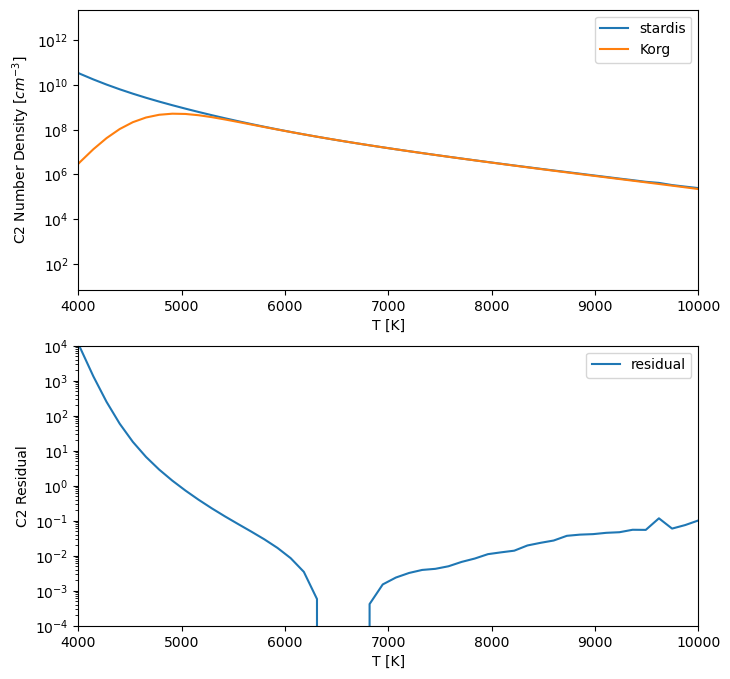

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax1 = plt.subplot(211)

plt.plot(stellar_model.temperatures, stellar_plasma.molecule_number_density.loc['C2'], label='stardis')
plt.plot(korg_densities['T'], korg_densities['C2'], label='Korg')

plt.yscale('log')
plt.xlabel('T [K]')
plt.ylabel('C2 Number Density $[cm^{-3}]$')
plt.xlim(4000, 10000)
plt.legend()

ax2 = plt.subplot(212, sharex= ax1)
plt.plot(stellar_model.temperatures, (stellar_plasma.molecule_number_density.loc['C2'] - korg_densities['C2']) / korg_densities['C2'], label='Fractional Difference')
plt.yscale('log')
plt.xlabel('T [K]')
plt.ylabel('C2 Fractional Difference')
plt.ylim(1e-4, 1e4)
plt.xlim(4000, 10000)
plt.legend()


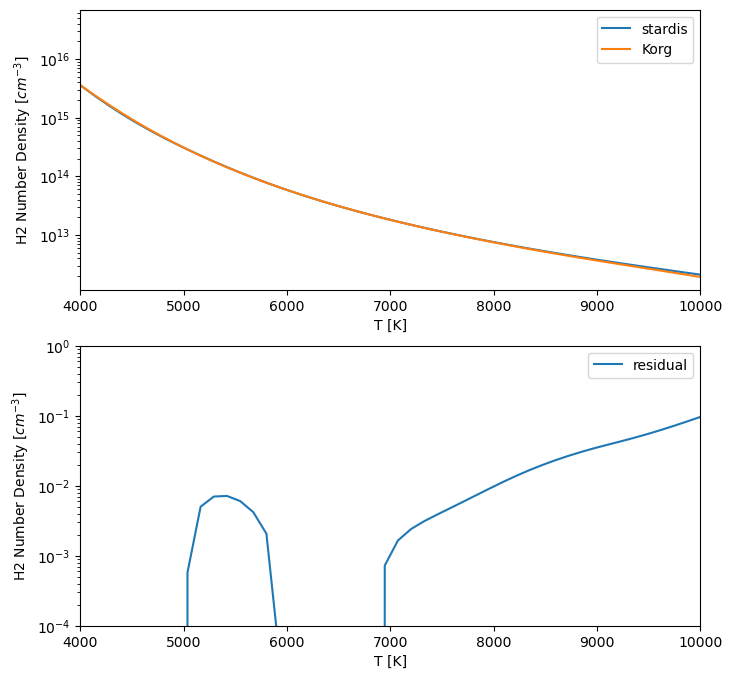

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax1 = plt.subplot(211)

plt.plot(stellar_model.temperatures, stellar_plasma.molecule_number_density.loc['H2'], label='stardis')
plt.plot(korg_densities['T'], korg_densities['H2'], label='Korg')

plt.yscale('log')
plt.xlabel('T [K]')
plt.ylabel('H2 Number Density $[cm^{-3}]$')
plt.xlim(4000, 10000)
plt.legend()

ax2 = plt.subplot(212, sharex= ax1)
plt.plot(stellar_model.temperatures, (stellar_plasma.molecule_number_density.loc['H2'] - korg_densities['H2']) / korg_densities['H2'], label='Fractional Difference')
plt.yscale('log')
plt.xlabel('T [K]')
plt.ylabel('H2 Fractional Difference')
plt.ylim(1e-4, 1)
plt.xlim(4000, 10000)
plt.legend()

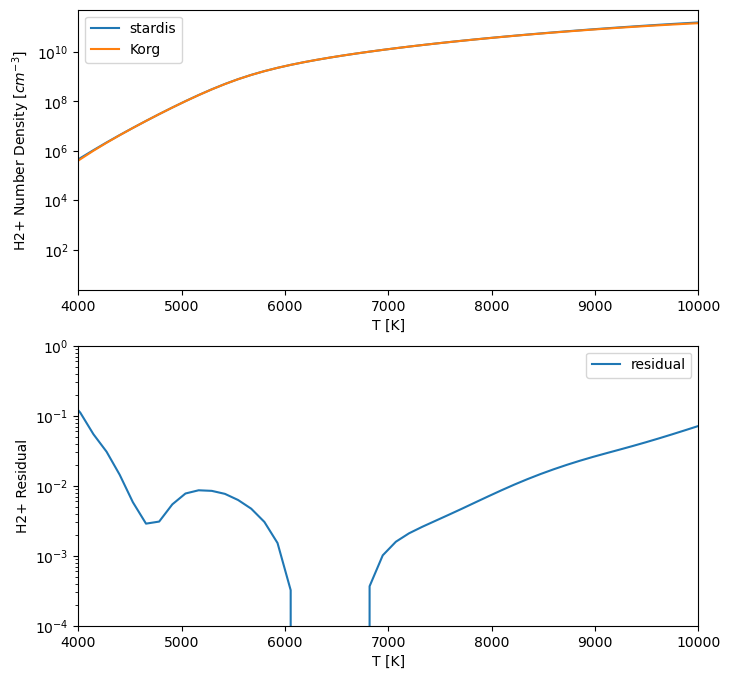

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax1 = plt.subplot(211)

plt.plot(stellar_model.temperatures, stellar_plasma.molecule_number_density.loc['H2+'], label='stardis')
plt.plot(korg_densities['T'], korg_densities['HHplus'], label='Korg')

plt.yscale('log')
plt.xlabel('T [K]')
plt.ylabel('H2+ Number Density $[cm^{-3}]$')
plt.xlim(4000, 10000)
plt.legend()

ax2 = plt.subplot(212, sharex= ax1)
plt.plot(stellar_model.temperatures, (stellar_plasma.molecule_number_density.loc['H2+'] - korg_densities['HHplus']) / korg_densities['HHplus'], label='Fractional Difference')
plt.yscale('log')
plt.xlabel('T [K]')
plt.ylabel('H2+ Fractional Difference')
plt.ylim(1e-4, 1)
plt.xlim(4000, 10000)
plt.legend()


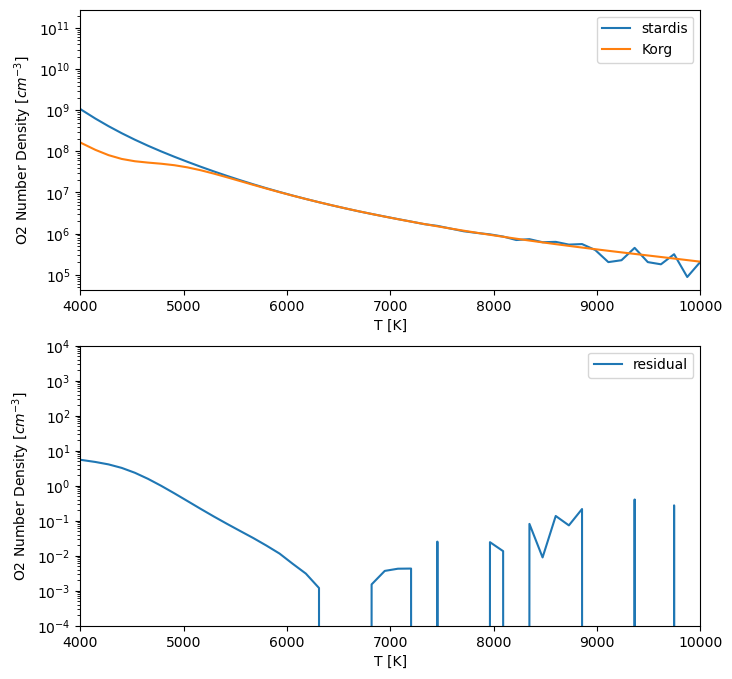

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax1 = plt.subplot(211)

plt.plot(stellar_model.temperatures, stellar_plasma.molecule_number_density.loc['O2'], label='stardis')
plt.plot(korg_densities['T'], korg_densities['O2'], label='Korg')

plt.yscale('log')
plt.xlabel('T [K]')
plt.ylabel('O2 Number Density $[cm^{-3}]$')
plt.xlim(4000, 10000)
plt.legend()

ax2 = plt.subplot(212, sharex= ax1)
plt.plot(stellar_model.temperatures, (stellar_plasma.molecule_number_density.loc['O2'] - korg_densities['O2']) / korg_densities['O2'], label='Fractional Difference')
plt.yscale('log')
plt.xlabel('T [K]')
plt.ylabel('O2 Fractional Difference')
plt.ylim(1e-4, 1e4)
plt.xlim(4000, 10000)
plt.legend()

This was a small comparison of choice molecules between stardis and korg, but the stellar plasma object contains much more information. We could also choose to look at any given ionization or excitation level of each atomic species.

In [13]:
stellar_plasma.ion_number_density

0             1             2   \
atomic_number ion_number                                             
1             0           1.333170e+17  1.333170e+17  1.333170e+17   
              1           2.738518e+03  1.887806e+04  1.119614e+05   
2             0           1.093668e+16  1.093668e+16  1.093668e+16   
              1           3.111301e-16  1.209731e-14  3.534625e-13   
              2           0.000000e+00  0.000000e+00  0.000000e+00   
...                                ...           ...           ...   
92            88          0.000000e+00  0.000000e+00  0.000000e+00   
              89          0.000000e+00  0.000000e+00  0.000000e+00   
              90          0.000000e+00  0.000000e+00  0.000000e+00   
              91          0.000000e+00  0.000000e+00  0.000000e+00   
              92          0.000000e+00  0.000000e+00  0.000000e+00   

                                    3             4             5   \
atomic_number ion_number                                             
1             0           1.333170e+17  1.333170e+17  1.333170e+17   
              1           5.766579e+05  2.585475e+06  1.013382e+07   
2             0           1.093668e+16  1.093668e+16  1.093668e+16   
              1           7.954445e-12  1.400211e-10  1.957991e-09   
              2           0.000000e+00  0.000000e+00  0.000000e+00   
...                                ...           ...           ...   
92            88          0.000000e+00  0.000000e+00  0.000000e+00   
              89          0.000000e+00  0.000000e+00  0.000000e+00   
              90          0.000000e+00  0.000000e+00  0.000000e+00   
              91          0.000000e+00  0.000000e+00  0.000000e+00   
              92          0.000000e+00  0.000000e+00  0.000000e+00   

                                    6             7             8   \
atomic_number ion_number                                             
1             0           1.333170e+17  1.333170e+17  1.333170e+17   
              1           3.515037e+07  1.098660e+08  3.153993e+08   
2             0           1.093668e+16  1.093668e+16  1.093668e+16   
              1           2.223270e-08  2.105025e-07  1.706455e-06   
              2           0.000000e+00  0.000000e+00  0.000000e+00   
...                                ...           ...           ...   
92            88          0.000000e+00  0.000000e+00  0.000000e+00   
              89          0.000000e+00  0.000000e+00  0.000000e+00   
              90          0.000000e+00  0.000000e+00  0.000000e+00   
              91          0.000000e+00  0.000000e+00  0.000000e+00   
              92          0.000000e+00  0.000000e+00  0.000000e+00   

                                    9   ...            46            47  \
atomic_number ion_number                ...                               
1             0           1.333170e+17  ...  1.311392e+17  1.308210e+17   
              1           8.458353e+08  ...  2.177806e+15  2.495957e+15   
2             0           1.093668e+16  ...  1.093668e+16  1.093668e+16   
              1           1.212486e-05  ...  4.042059e+08  5.695133e+08   
              2           0.000000e+00  ...  3.922646e-17  1.355096e-16   
...                                ...  ...           ...           ...   
92            88          0.000000e+00  ...  0.000000e+00  0.000000e+00   
              89          0.000000e+00  ...  0.000000e+00  0.000000e+00   
              90          0.000000e+00  ...  0.000000e+00  0.000000e+00   
              91          0.000000e+00  ...  0.000000e+00  0.000000e+00   
              92          0.000000e+00  ...  0.000000e+00  0.000000e+00   

                                    48            49            50  \
atomic_number ion_number                                             
1             0           1.304675e+17  1.300761e+17  1.296441e+17   
              1           2.849473e+15  3.240910e+15  3.672864e+15   
2             0           1.093668e+16  1.09366

In [14]:
stellar_plasma.level_number_density

0             1   \
atomic_number ion_number level_number                               
1             0          0             1.333170e+17  1.333170e+17   
              1          0             2.738518e+03  1.887806e+04   
2             0          0             1.093668e+16  1.093668e+16   
                         1             1.661479e-17  3.763092e-16   
                         2             2.546131e-19  6.536775e-18   
...                                             ...           ...   
92            88         0             0.000000e+00  0.000000e+00   
              89         0             0.000000e+00  0.000000e+00   
              90         0             0.000000e+00  0.000000e+00   
              91         0             0.000000e+00  0.000000e+00   
              92         0             0.000000e+00  0.000000e+00   

                                                 2             3   \
atomic_number ion_number level_number                               
1             0          0             1.333170e+17  1.333170e+17   
              1          0             1.119614e+05  5.766579e+05   
2             0          0             1.093668e+16  1.093668e+16   
                         1             6.677489e-15  9.542576e-14   
                         2             1.301989e-16  2.070421e-15   
...                                             ...           ...   
92            88         0             0.000000e+00  0.000000e+00   
              89         0             0.000000e+00  0.000000e+00   
              90         0             0.000000e+00  0.000000e+00   
              91         0             0.000000e+00  0.000000e+00   
              92         0             0.000000e+00  0.000000e+00   

                                                 4             5   \
atomic_number ion_number level_number                               
1             0          0             1.333170e+17  1.333170e+17   
              1          0             2.585475e+06  1.013382e+07   
2             0          0             1.093668e+16  1.093668e+16   
                         1             1.124429e-12  1.114832e-11   
                         2             2.693755e-14  2.928577e-13   
...                                             ...           ...   
92            88         0             0.000000e+00  0.000000e+00   
              89         0             0.000000e+00  0.000000e+00   
              90         0             0.000000e+00  0.000000e+00   
              91         0             0.000000e+00  0.000000e+00   
              92         0             0.000000e+00  0.000000e+00   

                                                 6             7   \
atomic_number ion_number level_number                               
1             0          0             1.333170e+17  1.333170e+17   
              1          0             3.515037e+07  1.098660e+08   
2             0          0             1.093668e+16  1.093668e+16   
                         1             9.464682e-11  6.986081e-10   
                         2             2.709363e-12  2.167044e-11   
...                                             ...           ...   
92            88         0             0.000000e+00  0.000000e+00   
              89         0             0.000000e+00  0.000000e+00   
              90         0             0.000000e+00  0.000000e+00   
              91         0             0.000000e+00  0.000000e+00   
              92         0             0.000000e+00  0.000000e+00   

                                                 8             9   ...  \
atomic_number ion_number level_number                              ...   
1             0          0             1.333170e+17  1.333170e+17  ...   
              1          0             3.153993e+08  8.458353e+08  ...   
2             0          0             1.093668e+16  1.093668e+16  ...   
                         1             4.543251e-09  2.633726e-08  ...   
             